# Fake News Detection Using ML 
Fake news detection is the process of identifying and classifying news articles or information that is intentionally misleading, inaccurate, or fabricated. Detecting fake news is crucial in the era of information overload, where misinformation can spread rapidly and have significant social and political consequences.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read the both datasets

In [6]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [14]:
fake.shape

(23481, 5)

In [15]:
true.shape

(21417, 5)

## Data cleaning and preparation

In [16]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [17]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [21]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [22]:
# Check the data
data.head()

,title,text,subject,date,target
0,Turkey's Erdogan links fate of detained U.S. p...,ANKARA (Reuters) - President Tayyip Erdogan su...,worldnews,"September 28, 2017",true
1,Yemen's Houthis blow up ex-president Saleh's h...,SANAA (Reuters) - Fighters from Yemen s armed ...,worldnews,"December 4, 2017",true
2,YIKES! WHAT THE HECK Did Hillary Just Cough Up...,Hillary was seen passing up a bottle of water ...,politics,"Sep 6, 2016",fake
3,"Taliban increases influence, territory in Afgh...",WASHINGTON (Reuters) - The Taliban has increas...,worldnews,"October 31, 2017",true
4,Immigration provision cut from Obamacare rollb...,WASHINGTON (Reuters) - Some conservatives in W...,politicsNews,"March 21, 2017",true


In [28]:
# Check the column names in the dataset
print(data.columns)

Index(['title', 'text', 'subject', 'target'], dtype='object')


In [29]:
# Removing the date (if it exists)
if 'date' in data.columns:
    data.drop(['date'], axis=1, inplace=True)


In [32]:
data.head()

,text,subject,target
0,ANKARA (Reuters) - President Tayyip Erdogan su...,worldnews,true
1,SANAA (Reuters) - Fighters from Yemen s armed ...,worldnews,true
2,Hillary was seen passing up a bottle of water ...,politics,fake
3,WASHINGTON (Reuters) - The Taliban has increas...,worldnews,true
4,WASHINGTON (Reuters) - Some conservatives in W...,politicsNews,true


In [34]:
# Removing the title (we will only use the text)
if 'title' in data.columns:
    data.drop(['title'], axis=1, inplace=True)

In [36]:
data.head()

,text,subject,target
0,ANKARA (Reuters) - President Tayyip Erdogan su...,worldnews,true
1,SANAA (Reuters) - Fighters from Yemen s armed ...,worldnews,true
2,Hillary was seen passing up a bottle of water ...,politics,fake
3,WASHINGTON (Reuters) - The Taliban has increas...,worldnews,true
4,WASHINGTON (Reuters) - Some conservatives in W...,politicsNews,true


In [11]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,brussels (reuters) - the european commission s...,worldnews,true
1,remember during the effort to get obamacare pa...,politics,fake
2,washington (reuters) - a senior european union...,politicsNews,true
3,washington (reuters) - hurricane harvey devast...,politicsNews,true
4,these people are sick and evil. they will stop...,politics,fake


In [37]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [39]:
# Check
data.head()

,text,subject,target
0,ANKARA Reuters President Tayyip Erdogan sugge...,worldnews,true
1,SANAA Reuters Fighters from Yemen s armed Hou...,worldnews,true
2,Hillary was seen passing up a bottle of water ...,politics,fake
3,WASHINGTON Reuters The Taliban has increased ...,worldnews,true
4,WASHINGTON Reuters Some conservatives in Wash...,politicsNews,true


In [ ]:
# Removing stopwords from a text column
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_word = set(stopwords.words('english'))

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [ ]:
 # Display the updated DataFrame
data.head()

## Basic data exploration
Data exploration is an essential step in any machine learning project. It involves analyzing and understanding the data to gain insights, identify patterns, and make informed decisions about data preprocessing, feature engineering, and model selection

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


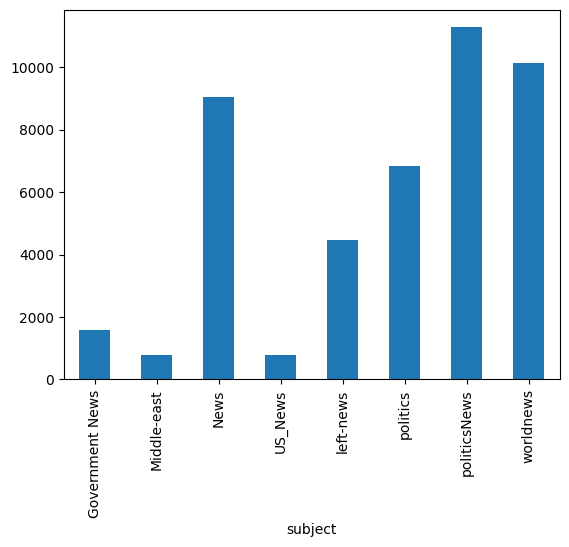

In [44]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


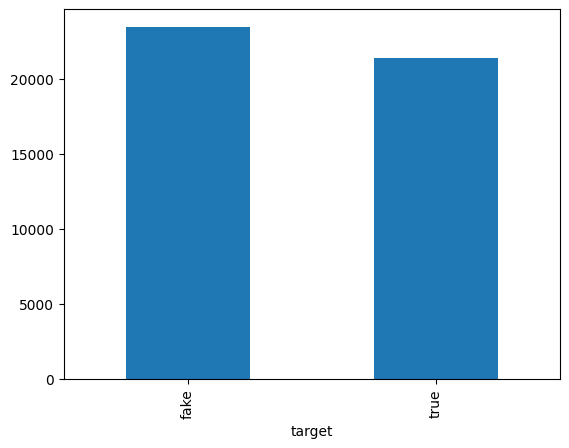

In [45]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

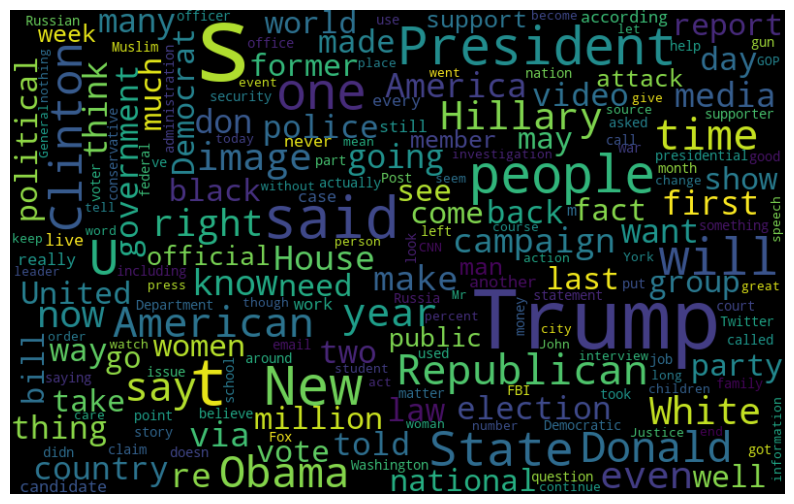

In [47]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
# Concatenate the fake news text into a single string
all_words = ' '.join([text for text in fake_data.text])
# Generate the word cloud
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
# Plot the word cloud
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

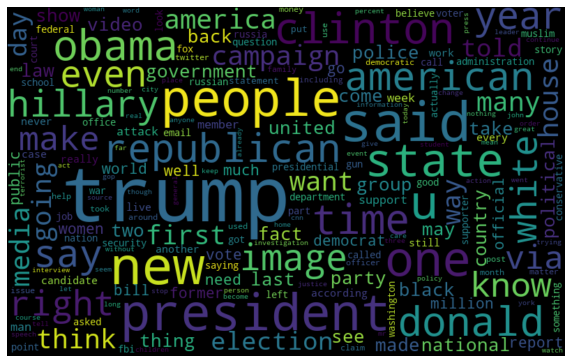

In [19]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
# Concatenate the real news text into a single string
all_words = ' '.join([text for text in fake_data.text])
# Generate the word cloud
wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)
# Plot the word cloud
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
# Most frequent words counter   
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

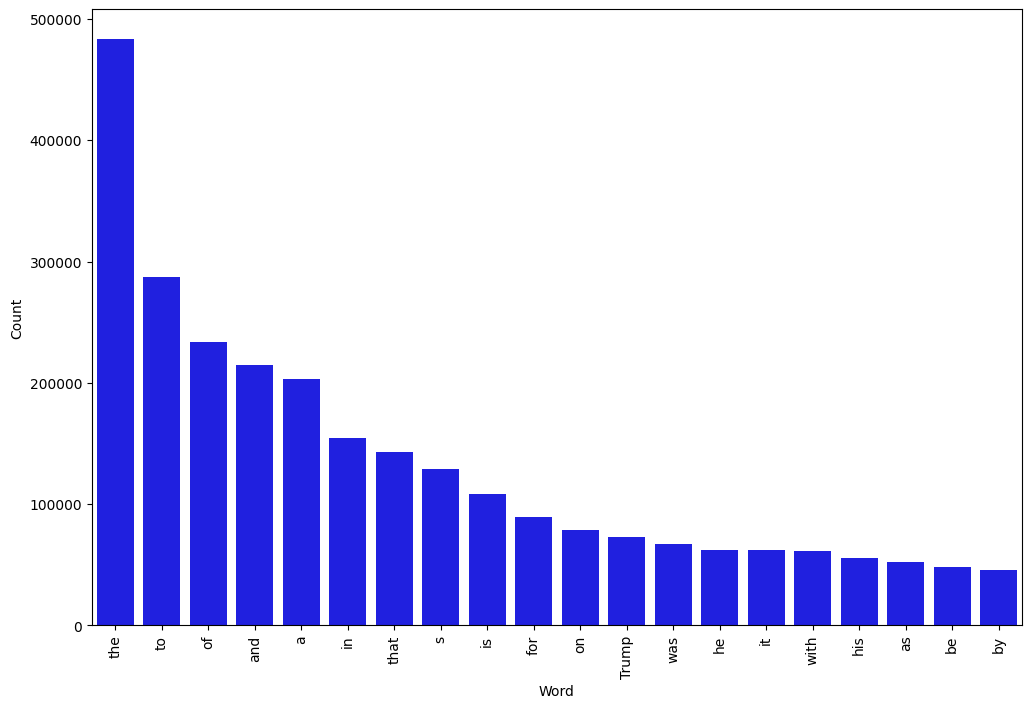

In [49]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

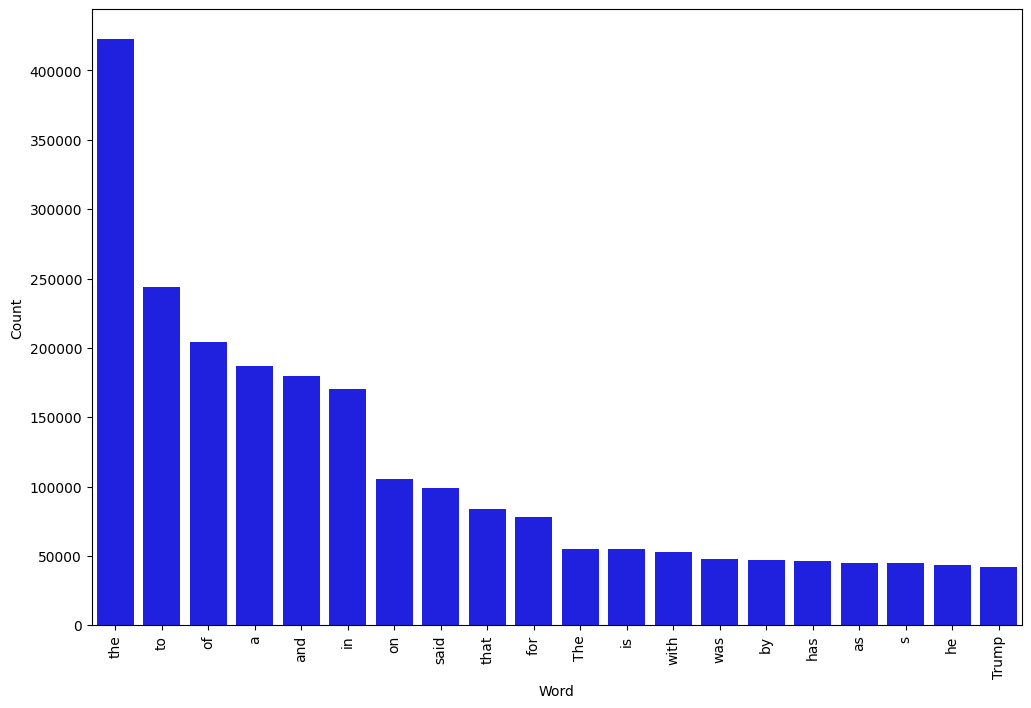

In [50]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modelling
Choose an appropriate machine learning algorithm based on the problem type (classification, regression, clustering,NBC etc.) and the characteristics of the datasetConsider algorithms such as logistic regression, decision trees, random forests, support vector machines (SVM), or deep learning models like neural networks.

In [51]:
# Function to plot the confusion matrix 
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [52]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# **Naive Bayes**




In [53]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 93.67%


Confusion matrix, without normalization


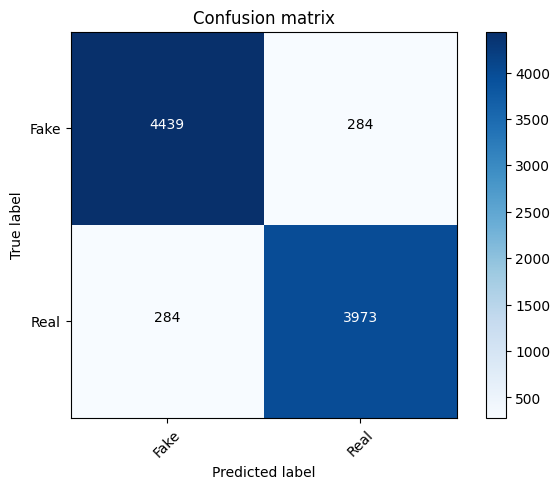

In [54]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Logistic Regression**
Logistic Regression is a popular machine learning algorithm used for binary classification tasks. It models the relationship between a dependent binary variable and one or more independent variables

In [55]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 98.64%


Confusion matrix, without normalization


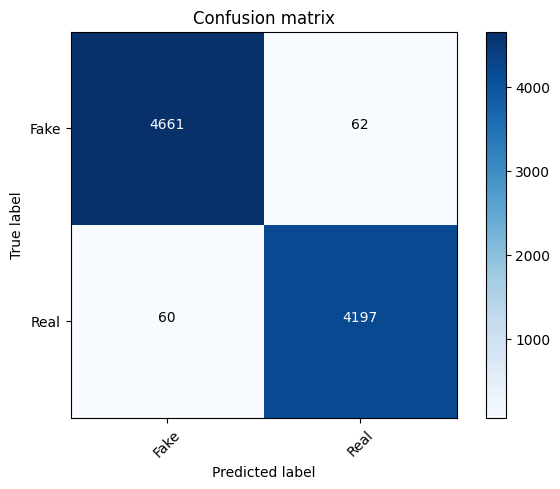

In [57]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Decision Tree**
A Decision Tree is a popular machine learning algorithm used for both classification and regression tasks. It creates a flowchart-like tree structure where each internal node represents a feature, each branch represents a decision rule, and each leaf node represents a class label or a predicted value.

In [58]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.57%


Confusion matrix, without normalization


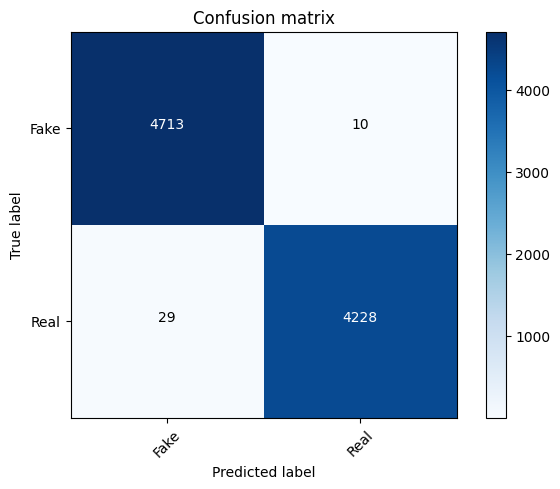

In [59]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Random Forest**
Random Forest is a popular machine learning algorithm that is an ensemble of decision trees. It combines the predictions of multiple decision trees to make more accurate and robust predictions

In [62]:
from sklearn.ensemble 
import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 98.3%


Confusion matrix, without normalization


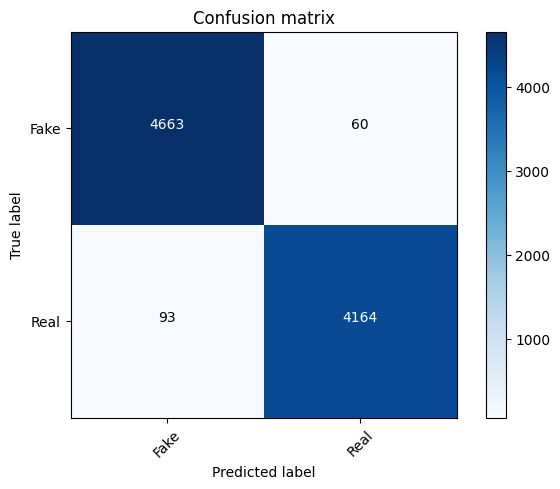

In [63]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])